IMPORTING DEPENDENCIES

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA LOADING TO DATAFRAME

In [61]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_predictionUC.csv')

In [62]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [63]:
# First 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
# number of rows and columns
loan_dataset.shape

(614, 13)

Statistic Data Information

In [65]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Preprocessing of Loan Sanction Data

In [66]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dropping of missing values

In [67]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [68]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

LABEL ENCODING(Loan_Status):

To convert the categorical column into numerical column.

In [69]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-69-9c9fabfe2615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [70]:
# First 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [71]:
# To know dependents count
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [72]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [73]:
# dependent values after conversion of 3+ to 4
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [74]:
# Area count in given dataset
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Data Analysis(Data Visualisation):

<Axes: xlabel='Gender', ylabel='count'>

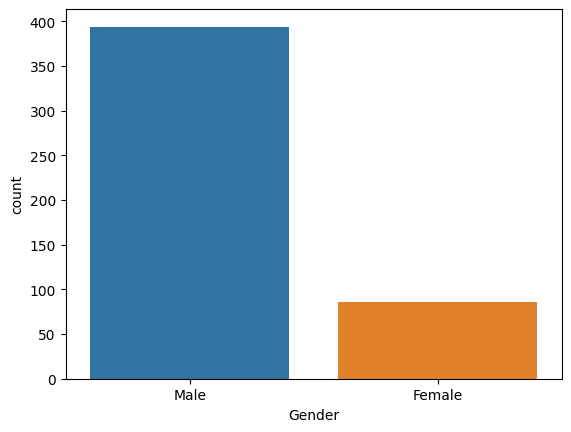

In [75]:
# Analysing gender(To show gender count)
sns.countplot(x='Gender',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

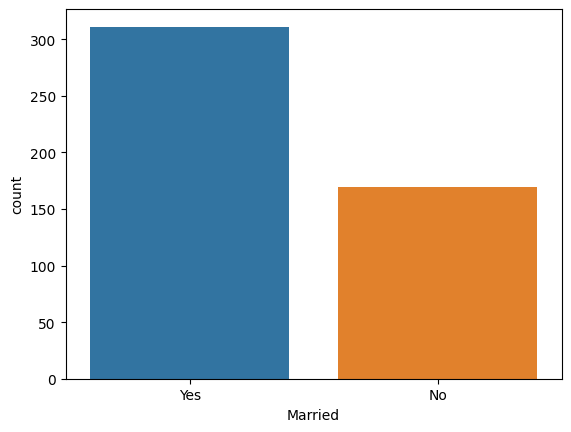

In [76]:
# Analysing Married(To show married count)
sns.countplot(x='Married',data=loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

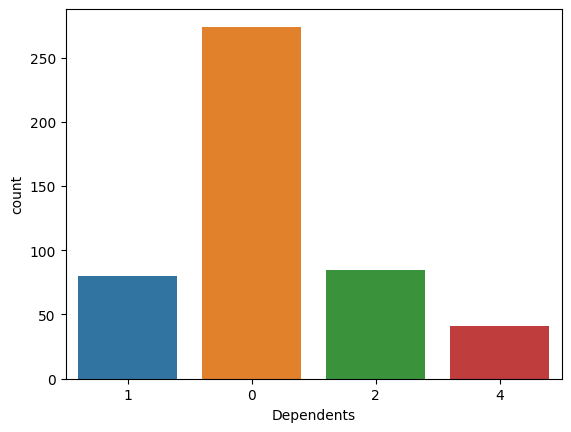

In [77]:
# Analysing Dependents(To show dependents count)
sns.countplot(x='Dependents',data=loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

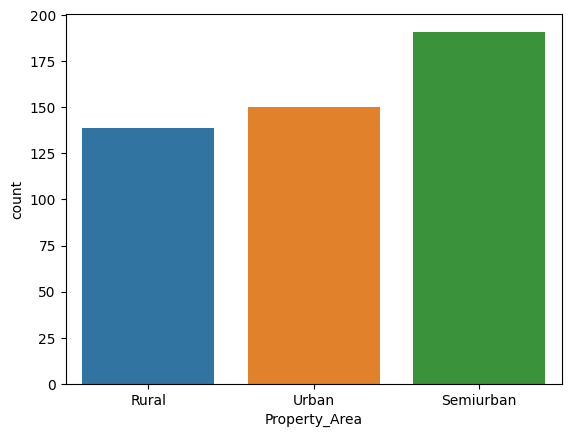

In [78]:
# Analysing Property_Area(To show property_area count)
sns.countplot(x='Property_Area',data=loan_dataset)

<Axes: xlabel='Education', ylabel='count'>

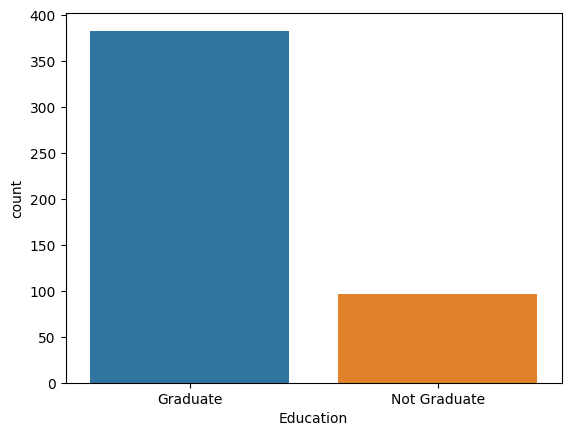

In [79]:
# Analysing Education(To show education count)
sns.countplot(x='Education',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

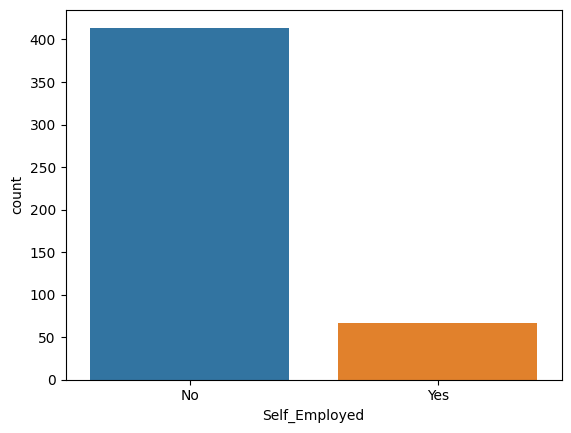

In [80]:
# Analysing Self_Employed(To show self_employed count)
sns.countplot(x='Self_Employed',data=loan_dataset)

<Axes: xlabel='Loan_Status', ylabel='count'>

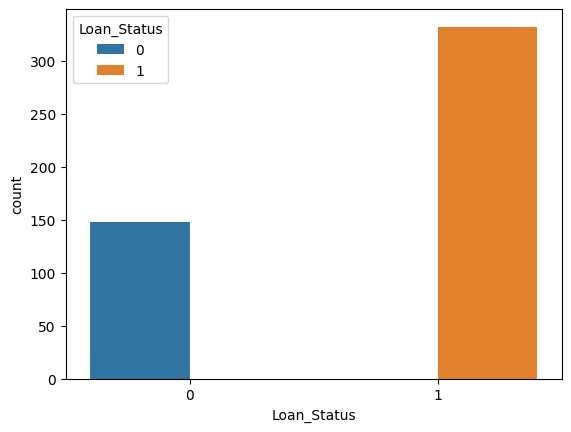

In [81]:
# Analysing Loan_Status(Yes=1,No=0)
sns.countplot(x='Loan_Status',hue='Loan_Status',data=loan_dataset)

Data Visualization(WITH LOAN_STATUS)

<Axes: xlabel='Education', ylabel='count'>

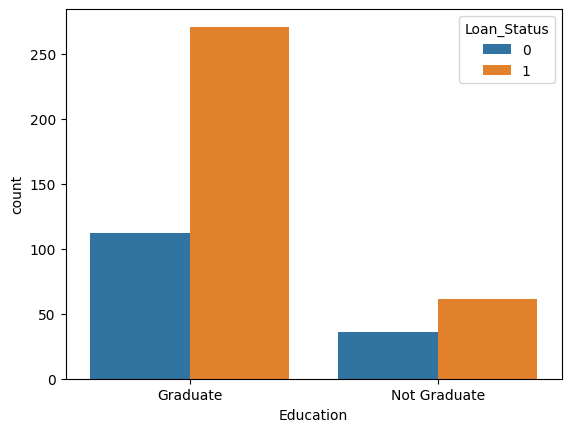

In [82]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

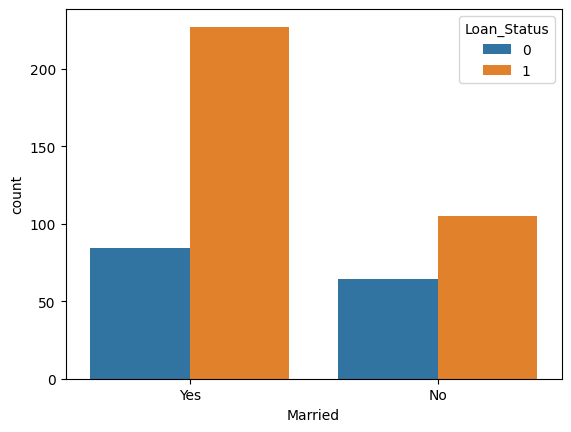

In [83]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

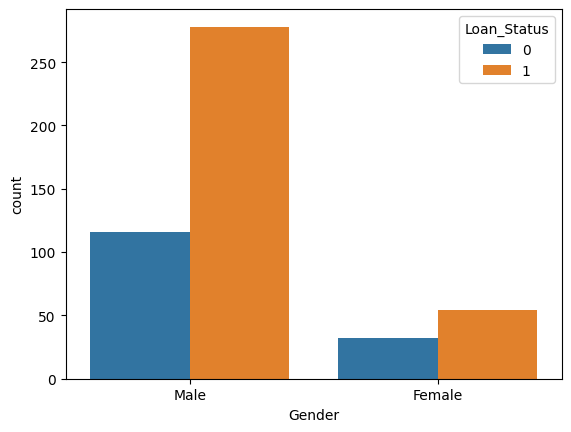

In [84]:
# education & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

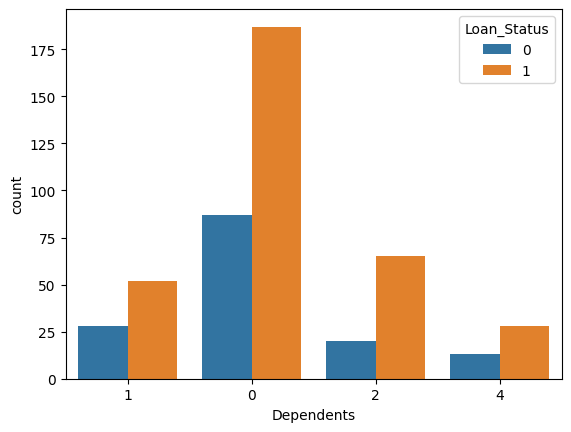

In [85]:
# Dependents  and Loan  Status
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

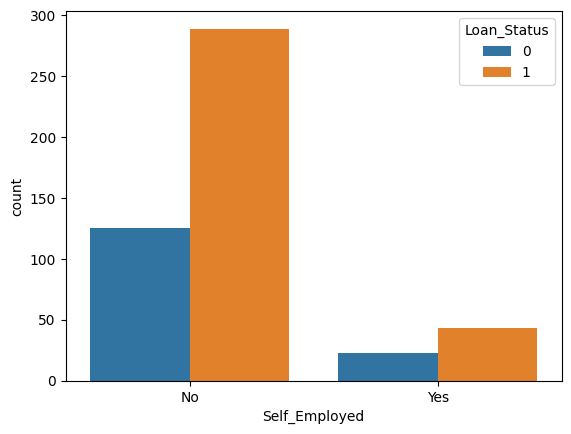

In [86]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

Label Encoding((In different way(replace)):

To convert the categorical column into numerical column.

In [87]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [88]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Split Data For Training

In [89]:
# separating the data and label
X =  loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_dataset['Loan_Status']

In [90]:
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [91]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [92]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training SVM model:

Support Vector Machine Model

In [93]:
classifier = svm.SVC(kernel='linear')

In [94]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

Model Evaluation Training of Data

In [95]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [96]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [97]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)

In [98]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


MODEL TRAINING USING VARIOUS WAYS

Logistic Regression:

In [99]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
 x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 model.fit(x_train, y_train)
 print("Accuracy is", model.score(x_test, y_test)*100)
 # cross validation - it is used for better validation of model
 # eg: cv-5, train-4, test-1
 score = cross_val_score(model, x, y, cv=5)
 print("Cross validation is",np.mean(score)*100)

In [100]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy is 76.66666666666667
Cross validation is 79.375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Decision Tree:

In [101]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 69.16666666666667
Cross validation is 71.875


Random Forest:

In [102]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 79.16666666666666
Cross validation is 79.79166666666667


Extra Tree:

In [103]:
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 77.5
Cross validation is 75.83333333333334


Confusion Matrix:

A confusion matrix is a summary of prediction results on a classification problem.

It gives insight on both errors and types of error that we make.

Number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [104]:
# Using Random Forest Model
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
# Using Default Parameters
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)# y_test=actual values from dataset
cm                                #y_pred=predicted values from model

array([[ 9,  6],
       [ 3, 30]])

<Axes: >

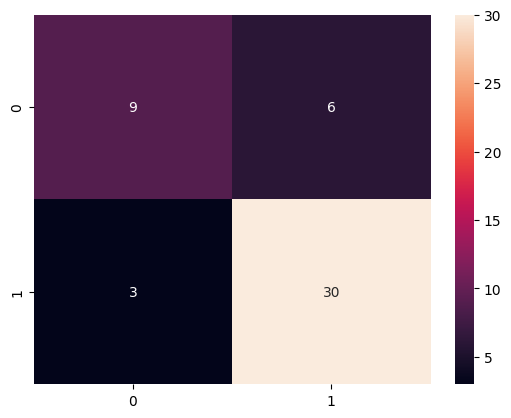

In [106]:
# Confusion Matrix in Diagramatic Form(Heat Map)
sns.heatmap(cm,annot=True)

Confusion Matrix :

Left side(HeatMap)=actual values && Bottom side(HeatMap)=predicted values

->For actual values:
   '0'= 9 correct predictions,
   '1'= 31 correct predictions.

->Model has falsely predicted 6 counts for class '0'.   

CONCLUSIONS:

->Left diagonal shows correctly predicted numbers.

->Right diagonal shows uncorrectly predicted numbers.

->For multiple classes,the matrix will be in n*n matrix order,where 'n' is number of output classes.